In [1]:
include("ToolBox/ToolBox.jl")
using .ToolBox
using .Geometry

In [2]:
padding = 2; # to display images

### Reflector in Image 1 15. Marts

In [3]:
path_img1 = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/measurement/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.tiff"
path_meta_1 = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170315T053950_20170315T054018_004715_0083B0_7EE9.SAFE/annotation/s1b-iw3-slc-vv-20170315t053950-20170315t054018-004715-0083b0-006.xml"
path_pod_1 = "/Users/simon/Data/Sentinel/S1B_OPER_AUX_POEORB_OPOD_20170404T111500_V20170314T225942_20170316T005942.EOF"
dem_path = "/Users/simon/Data/DEM/srtm_38_01/srtm_38_01.tif"

"/Users/simon/Data/DEM/srtm_38_01/srtm_38_01.tif"

In [4]:
reflector_index_1 = hcat([1126,6087],[1123, 6100],[1127, 6111])'

3×2 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 1126  6087
 1123  6100
 1127  6111

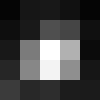

In [5]:
index = reflector_index_1[1,:]
view =[(index[1]-padding):(index[1]+padding), (index[2]-padding):(index[2]+padding)]
SlcUtil.show_img(Load.slc_data(path_img1,view))

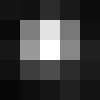

In [22]:
index = reflector_index_1[2,:]
view =[(index[1]-padding):(index[1]+padding), (index[2]-padding):(index[2]+padding)]
SlcUtil.show_img(Load.slc_data(path_img1,view))

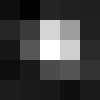

In [23]:
index = reflector_index_1[3,:]
view =[(index[1]-padding):(index[1]+padding), (index[2]-padding):(index[2]+padding)]
SlcUtil.show_img(Load.slc_data(path_img1,view))

In [8]:
meta_1 = Load.slc_meta(path_meta_1);
precise_orbit_1 = Load.precise_orbit(path_pod_1,meta_1["t_0"]);

### Get heights

In [9]:
offset = 39;

In [10]:
footprint = SlcUtil.footprint(meta_1, view)
latlon_window = ((minimum(footprint[1]),maximum(footprint[1])),(minimum(footprint[2]),maximum(footprint[2])))
lat_dem,lon_dem, dem = Load.dem(dem_path, latlon_window; nan_fill= 0, padding=[90,90]);
dem .=  dem .+ offset;

In [11]:
lat_dem, lon_dem, dem = Misc.flatten(lat_dem,lon_dem,dem);
line_sample_dem = to_line_sample(hcat(lat_dem,lon_dem),dem,precise_orbit_1...,meta_1);
heights = Misc.interp(line_sample_dem[:,1], line_sample_dem[:,2], dem, 
                            reflector_index_1[:,1], reflector_index_1[:,2])

3-element Array{Float64,1}:
 42.42489916585899 
 40.021494127411145
 38.37926782443094 

### Convert to coordinates

In [12]:
lat_lon = to_lat_lon(reflector_index_1, heights, precise_orbit_1..., meta_1)

3×2 Array{Float64,2}:
 56.5619  8.30745
 56.5623  8.30688
 56.5619  8.30615

## Find Index in image 2  27. Marts

In [13]:
path_img2 = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170327T053950_20170327T054018_004890_0088AE_3CC1.SAFE/measurement/s1b-iw3-slc-vv-20170327t053950-20170327t054018-004890-0088ae-006.tiff"
path_meta_2 = "/Users/simon/Data/Sentinel/S1B_IW_SLC__1SDV_20170327T053950_20170327T054018_004890_0088AE_3CC1.SAFE/annotation/s1b-iw3-slc-vv-20170327t053950-20170327t054018-004890-0088ae-006.xml"
path_pod_2 = "/Users/simon/Data/Sentinel/S1B_OPER_AUX_POEORB_OPOD_20170416T111343_V20170326T225942_20170328T005942.EOF"

"/Users/simon/Data/Sentinel/S1B_OPER_AUX_POEORB_OPOD_20170416T111343_V20170326T225942_20170328T005942.EOF"

In [14]:
meta_2 = Load.slc_meta(path_meta_2);
precise_orbit_2 = Load.precise_orbit(path_pod_2,meta_2["t_0"]);

In [15]:
reflector_index_2 = to_line_sample(lat_lon, heights, precise_orbit_2...,meta_2 )

3×2 Array{Float64,2}:
 1126.17  6070.31
 1123.17  6083.31
 1127.17  6094.31

In [16]:
round.(Int,reflector_index_2)

3×2 Array{Int64,2}:
 1126  6070
 1123  6083
 1127  6094

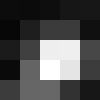

In [17]:
index = round.(Int,reflector_index_2[1,:])
view =[(index[1]-padding):(index[1]+padding), (index[2]-padding):(index[2]+padding)]
SlcUtil.show_img(Load.slc_data(path_img2,view))

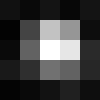

In [18]:
index = round.(Int,reflector_index_2[2,:])
view =[(index[1]-padding):(index[1]+padding), (index[2]-padding):(index[2]+padding)]
SlcUtil.show_img(Load.slc_data(path_img2,view))

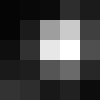

In [19]:
index = round.(Int,reflector_index_2[3,:])
view =[(index[1]-padding):(index[1]+padding), (index[2]-padding):(index[2]+padding)]
SlcUtil.show_img(Load.slc_data(path_img2,view))